# Dans ce script on calcul la contribution des ménages à la TVA, par décile de revenu. On compare également l'importance de différents taux de TVA dans la consommation des ménages selon le décile de revenu.

In [11]:
import pandas
import seaborn
from openfisca_france_indirect_taxation.examples.utils_example import graph_builder_bar
from openfisca_france_indirect_taxation.surveys import SurveyScenario

seaborn.set_palette(seaborn.color_palette("Set2", 12))
%matplotlib inline

# Calcul de la part de chaque type de TVA dans le revenu disponible des ménages, par décile de revenu

Part de chaque type de TVA dans le revenu disponible des ménages pour l'année 2000


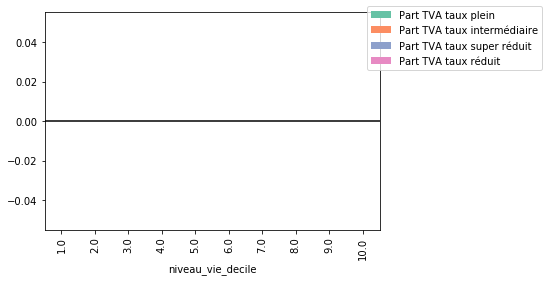

Part de chaque type de TVA dans le revenu disponible des ménages pour l'année 2005


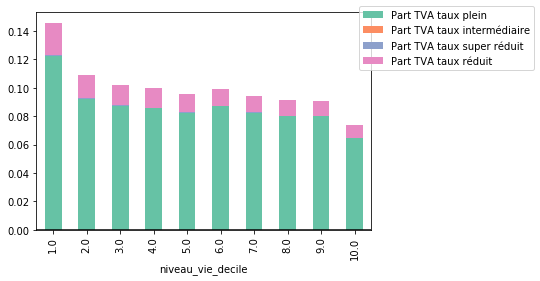

Part de chaque type de TVA dans le revenu disponible des ménages pour l'année 2011


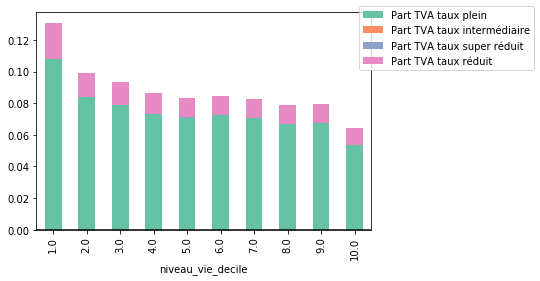

In [25]:
simulated_variables = [
    'tva_taux_plein',
    'tva_taux_intermediaire',
    'tva_taux_reduit',
    'tva_taux_super_reduit',
    'rev_disponible',
    'tva_total'
    ]

for year in [2000, 2005, 2011]:
    survey_scenario = SurveyScenario.create(year = year)
    pivot_table = pandas.DataFrame()
    for values in simulated_variables:
        pivot_table = pandas.concat([
            pivot_table,
            survey_scenario.compute_pivot_table(
                values = [values], 
                columns = ['niveau_vie_decile'],
                period = year,
                )
            ])
    taxes_indirectes = pivot_table.T
    taxes_indirectes['Part TVA taux super réduit'] = \
        taxes_indirectes.tva_taux_super_reduit / taxes_indirectes.rev_disponible
    taxes_indirectes['Part TVA taux réduit'] = \
        taxes_indirectes.tva_taux_reduit / taxes_indirectes.rev_disponible
    taxes_indirectes['Part TVA taux intermédiaire'] = \
        taxes_indirectes.tva_taux_intermediaire / taxes_indirectes.rev_disponible
    taxes_indirectes['Part TVA taux plein'] = \
        taxes_indirectes.tva_taux_plein / taxes_indirectes.rev_disponible

    df_to_graph = taxes_indirectes[['Part TVA taux plein', 'Part TVA taux intermédiaire',
        'Part TVA taux super réduit', 'Part TVA taux réduit']]

    print("Part de chaque type de TVA dans le revenu disponible des ménages pour l'année {}".format(year))
    graph_builder_bar(df_to_graph, stacked = True)


Part de chaque type de TVA dans la contribution totale en TVA des ménages pour l'année 2000


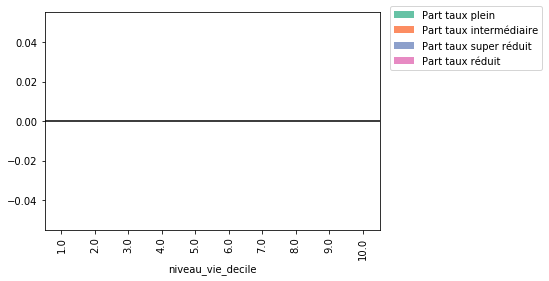

Part de chaque type de TVA dans la contribution totale en TVA des ménages pour l'année 2005


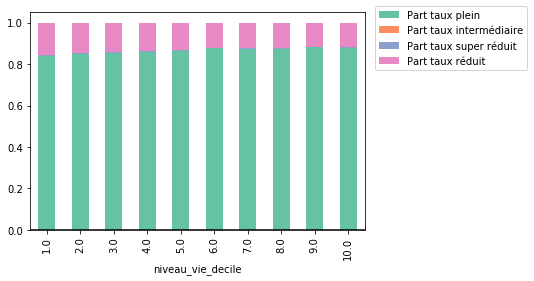

Part de chaque type de TVA dans la contribution totale en TVA des ménages pour l'année 2011


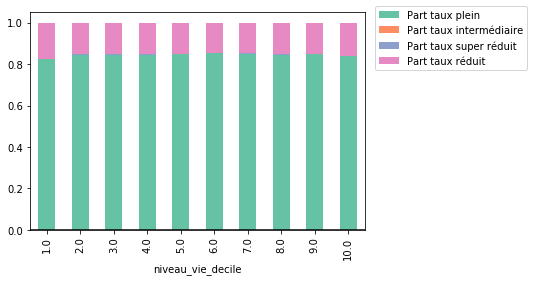

In [22]:
for year in [2000, 2005, 2011]:
    survey_scenario = SurveyScenario.create(year = year)
    pivot_table = pandas.DataFrame()
    for values in simulated_variables:
        pivot_table = pandas.concat([
            pivot_table,
            survey_scenario.compute_pivot_table(
                values = [values], columns = ['niveau_vie_decile'], period = year
                )
            ])
    taxes_indirectes = pivot_table.T

    taxes_indirectes[u'Part taux super réduit'] = \
        taxes_indirectes['tva_taux_super_reduit'] / taxes_indirectes['tva_total']
    taxes_indirectes[u'Part taux réduit'] = \
        taxes_indirectes['tva_taux_reduit'] / taxes_indirectes['tva_total']
    taxes_indirectes[u'Part taux intermédiaire'] = \
        taxes_indirectes['tva_taux_intermediaire'] / taxes_indirectes['tva_total']
    taxes_indirectes[u'Part taux plein'] = \
        taxes_indirectes['tva_taux_plein'] / taxes_indirectes['tva_total']

    df_to_graph = taxes_indirectes[[u'Part taux plein', u'Part taux intermédiaire',
        u'Part taux super réduit', u'Part taux réduit']]

    print("Part de chaque type de TVA dans la contribution totale en TVA des ménages pour l'année {}".format(year))
    graph_builder_bar(df_to_graph, stacked = True)
